Q#1) Here Are the Issues I found with the Dataset:

    1) Lack of Standard: The number of Queries in the Click_action is more than the ones load_action. It has caused issues below and more:
    
        - unrelated click_actions: load data for the ckicked post is not available
        
        - misscalculations will occure due to confusion
        
    2) existing of "#name?" which represent unregistered accounts : existing of such data might cause misscalculation due to personalization
    
    3) It would be greatly beneficial if load data and click data was stored seperatly 
    

#initialization of Data

In [43]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import yaml
import scipy.stats as stats


taskData = pd.read_csv("Data.csv", converters = { "tokens" : lambda tokenList : tokenList [1: -1].split(',')})
action = taskData.groupby(taskData.action)
loadData = action.get_group("load_post_page").dropna(axis = 1, how = 'all')
clickData = action.get_group("click_post").dropna(axis = 1, how = 'all')

Q#2 Part1) 
    
    result of DarkQueryPercent: 12.685214795863981

In [44]:
darkQueries = loadData[(loadData.post_page_offset == 0) & (loadData.tokens.map(len) < 10)].shape[0]
allLoadQueries = loadData.source_event_id.unique().shape[0]
DarkQueryPercent = (darkQueries / allLoadQueries) * 100

Q#2 part2) 

    result of bouncedQueryPercent: 32.125693160813306

    P.S: Due to the issues mentioned above there is a confusion about what to consider as allQueries I decided to go with clickQueries for this part

In [45]:
queries = loadData.drop_duplicates(subset = 'source_event_id')
clickedQueries = clickData.source_event_id.unique()
bouncedQueries = queries[~queries.source_event_id.isin(clickedQueries)].shape[0]
allClickQueries = clickedQueries.shape[0]
bouncedQueryPercent = (bouncedQueries / allClickQueries) * 100

Q#3) 

For this part I chose the 3rd metric which is the average rate of clicked posts for the following reasons: 

    - comparing to the 1st metric: it better shows which range of posts have been clicked rather than the percent of clicked posts

    - comparing to the 2nd metric: it better focuses on all clicks rather than just one click

    - comparing to the 4th metric: it better focuses on all clicks rather than just a specified porportion

In [46]:
queryGroup = clickData.groupby('source_event_id').post_index_in_post_list
metric = queryGroup.max() / queryGroup.count()

I then removed the outliers and used the 98 percent remaining data to calculate a more valid mean

notice that in the metric unclicked queries weren't taken into account. They must go under a diffrent process to get the best results.



In [47]:
def removeOutliers(series):
    ndarr = series.to_numpy()
    mean = np.mean(ndarr)
    std = np.std(ndarr)
    dst = abs(ndarr - mean)
    maxDst = 2
    return series[dst < maxDst * std]

<BarContainer object of 2 artists>

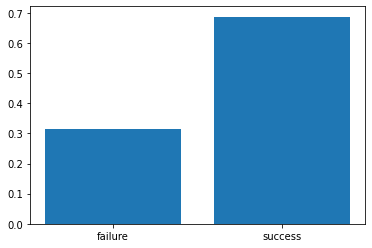

In [27]:
newMetric = removeOutliers(metric)
mean = np.mean(newMetric)
total = metric.size
p = metric[metric <= mean].size / total
y = [1 - p,p]
x = ["failure", "success"]
plt.bar(x, y)

Personally I think bernoulli distribution might not give us much insight (It could've been super useful if This was an A/B test).

Honostly I don't even know what are we trying to do with a bernoulli distribution model :) 


Other metrics distribution will be presented here: 

1st metric

    this one was a bit tricky because of the issues I mentioned in the first question so I decided to change it a little bit by ignoring load data and focusing on data presented in the click

2nd metric

<BarContainer object of 2 artists>

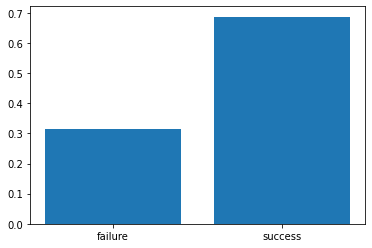

In [48]:
metric2 = removeOutliers(queryGroup.min())
mean2 = np.mean(metric2)
p2 = metric2[metric2 <= mean].size / total
y2 = [1 - p2,p2]
x2 = ["failure", "success"]
plt.bar(x, y)

4th metric

<BarContainer object of 2 artists>

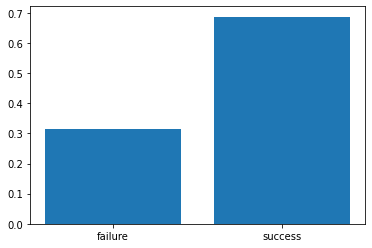

In [49]:
tst = queryGroup.min()
p4 = tst[tst <= 3].size / total
y4 = [1 - p4,p4]
x4 = ["failure", "success"]
plt.bar(x, y)

interestingly enough! A bernoulli distribution over all metrics shows that they all almost share the same result(I don't know if this is random or not but OMG LOL!)

    Mohammad Javad Afsari
    javad.afsari01@gmail.com
    Thank u for reading